#**Skill: PySpark**
If your agenda is one of the following, please follow along this notebook to learn PySpark skill:
- Want to learn PySpark? 
- Have a huge dataset and want to do analysis to extract insights from it?
- Want to become a Data Engineer?

**Background**:   
[PySpark](https://spark.apache.org/docs/latest/api/python/) is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.    

In this notebook, we will try to answer few questions to learn PySpark. Let's practice!

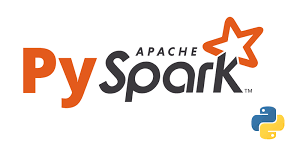

Install PySpark in this colab notebook

In [ ]:
!pip install pyspark

## Introduction
[Apache Spark](https://sparkbyexamples.com/pyspark/what-is-pyspark-and-who-uses-it/) is an open-source framework written in Scala for processing large datasets in a distributed manner (in a cluster). Spark runs 100 times faster than traditional processing due to its in-memory processing. PySpark is a Python API for Apache Spark to process larger datasets in a distributed cluster. It is written in Python to run a Python application using Apache Spark capabilities. 

[The entry point](https://spark.apache.org/docs/latest/sql-getting-started.html) into all functionality in Spark is the SparkSession class. To create a basic SparkSession, just use SparkSession.builder. 

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()



---


**Question 1:	Read csv data from this link http://cran-logs.rstudio.com/2022/2022-12-19-r.csv.gz . Print the dataset:    
a.  without header.  
b.	with header.  
c.	display its schema**

From our demo, we will use a dataset from R Studio. Follow the steps to download the dataset and upload it to this notebook.    
1. Click this link http://cran-logs.rstudio.com/2022/2022-12-19-r.csv.gz
2. Save the dataset in your local
3. Click on Files on your left of this notebook
4. Upload the dataset 

In [11]:
#!wget -O "2022-12-19-r.csv" "http://cran-logs.rstudio.com/2022/2022-12-19-r.csv.gz"
print("Dataset downloaded into the /content folder.")

Dataset downloaded into the /content folder.


The below command is used to read the csv dataset without header  *header = False*.    
*inferSchema = True* defines the datatype of a column and we don't have to explicitly define schema of the dataset. Below we will try to create schema for this dataset.

In [9]:
df = spark.read.csv("/content/2022-12-19-r.csv", header=False, inferSchema= True)

In [10]:
df.show()

+----------+--------+--------+-------+---+-------+-----+
|       _c0|     _c1|     _c2|    _c3|_c4|    _c5|  _c6|
+----------+--------+--------+-------+---+-------+-----+
|      date|    time|    size|version| os|country|ip_id|
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|
|2022-12-19|14:51:46|79626319|  4.2.2|win|     DE|   11|
|2022-12-19|14:51:33|34025678|  4.2.2|src|     US|   12|
|2022-12-19|14:51:45|79628062|  4.2.2|win|     NA|   13|
|2022-12-19|14:51:43|92688889| 

Explanation: From the above output, notice the column names *_c0, _c1 etc*. This is because, we told spark that don't look for header by header=False

Let's tell the spark to look for the column names in the dataset.

In [12]:
df = spark.read.csv("/content/2022-12-19-r.csv", header=True, inferSchema= True)

In [13]:
df.show()

+-------------------+-------------------+--------+-------+---+-------+-----+
|               date|               time|    size|version| os|country|ip_id|
+-------------------+-------------------+--------+-------+---+-------+-----+
|2022-12-19 00:00:00|2023-02-01 14:51:01|79634361|  4.2.2|win|     ID|    1|
|2022-12-19 00:00:00|2023-02-01 14:51:15| 1050138|  4.2.2|osx|     SE|    2|
|2022-12-19 00:00:00|2023-02-01 14:51:09|90304560|  4.2.2|osx|     GB|    3|
|2022-12-19 00:00:00|2023-02-01 14:51:20|92792340|  4.2.2|osx|     US|    4|
|2022-12-19 00:00:00|2023-02-01 14:51:27| 4199715|  4.2.2|osx|     CA|    5|
|2022-12-19 00:00:00|2023-02-01 14:51:24|79538110|  4.2.2|win|     FR|    6|
|2022-12-19 00:00:00|2023-02-01 14:51:30|79625974|  4.2.2|win|     ES|    7|
|2022-12-19 00:00:00|2023-02-01 14:51:28|92792679|  4.2.2|osx|     IT|    8|
|2022-12-19 00:00:00|2023-02-01 14:51:35|79627146|  4.2.2|win|     DE|    9|
|2022-12-19 00:00:00|2023-02-01 14:51:26|90825201|  4.1.2|osx|     US|   10|

Explanation: Notice that spark looked for the column names and printed it by header=True

Let's check how the spark has defined the datatype of columns.

In [14]:
df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- size: integer (nullable = true)
 |-- version: string (nullable = true)
 |-- os: string (nullable = true)
 |-- country: string (nullable = true)
 |-- ip_id: integer (nullable = true)



Explanation: Spark has defined the datatype of columns by inferSchema=True.    
If you don't want the spark to define datatypes automatically, mention inferSchema=False. Try it out!

**Question 2: Change schema as per datatypes** 

PySpark [StructType & StructField](https://sparkbyexamples.com/pyspark/pyspark-structtype-and-structfield/) classes are used to programmatically specify the schema to the DataFrame and create complex columns like nested struct, array, and map columns. StructType is a collection of StructField’s that defines column name, column data type, boolean to specify if the field can be nullable or not and metadata.   

Spark SQL and DataFrames support a number of data types mentioned in this link: [Supported-Data-types](https://spark.apache.org/docs/3.3.1/sql-ref-datatypes.html#supported-data-types)

In [15]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, TimestampType
schema = StructType([
                    StructField("date", StringType(), True), \
                    StructField("time", StringType(), True), \
                    StructField("size", IntegerType(), True), \
                    StructField("version", StringType(), True), \
                    StructField("os", StringType(), True), \
                    StructField("country", StringType(), True), \
                    StructField("ip_id", IntegerType(), True)
                    ])

Now, instead of inferSchema = True, let's pass the schema that we built.

In [16]:
df = spark.read.csv("/content/2022-12-19-r.csv", header=True, schema= schema)
df.show()
df.printSchema()

+----------+--------+--------+-------+---+-------+-----+
|      date|    time|    size|version| os|country|ip_id|
+----------+--------+--------+-------+---+-------+-----+
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|
|2022-12-19|14:51:46|79626319|  4.2.2|win|     DE|   11|
|2022-12-19|14:51:33|34025678|  4.2.2|src|     US|   12|
|2022-12-19|14:51:45|79628062|  4.2.2|win|     NA|   13|
|2022-12-19|14:51:43|92688889|  4.2.2|osx|     US|   14|
|2022-12-19|14:51:51|79627091| 

**Question 3:	Change schema by adding date time columns into nested column "Date_Time"**

[PySpark withColumn()](https://sparkbyexamples.com/pyspark/pyspark-withcolumn/) is a transformation function of DataFrame which is used to change the value, convert the datatype of an existing column, create a new column, and many more

In [17]:
from pyspark.sql import functions

new_df =df.withColumn("datetime", functions.concat(functions.col("date"), functions.lit(" "), functions.col("time")))

In [18]:
new_df.show()

+----------+--------+--------+-------+---+-------+-----+-------------------+
|      date|    time|    size|version| os|country|ip_id|           datetime|
+----------+--------+--------+-------+---+-------+-----+-------------------+
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|2022-12-19 14:51:01|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|2022-12-19 14:51:15|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|2022-12-19 14:51:09|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|2022-12-19 14:51:20|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|2022-12-19 14:51:27|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|2022-12-19 14:51:24|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|2022-12-19 14:51:30|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|2022-12-19 14:51:28|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|2022-12-19 14:51:35|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|2022-12-19 14:51:26|

**Question 4:	Dispay "ip_id" and "country" alone**

To select a single column, multiple columns and all columns from the dataset, we'll use select('col_name'), select(['col_name1', 'col_name2']), select('*')  functions respectively

In [19]:
new_df.select(["ip_id", "country"]).show()

+-----+-------+
|ip_id|country|
+-----+-------+
|    1|     ID|
|    2|     SE|
|    3|     GB|
|    4|     US|
|    5|     CA|
|    6|     FR|
|    7|     ES|
|    8|     IT|
|    9|     DE|
|   10|     US|
|   11|     DE|
|   12|     US|
|   13|     NA|
|   14|     US|
|   13|     NA|
|   15|     IN|
|   13|     NA|
|   16|     US|
|   17|     TW|
|   18|     CH|
+-----+-------+
only showing top 20 rows



**Question 5:	Add new column with size in MB**

To select a column, we could also use col() function and do operations on it

In [21]:
from pyspark.sql.functions import col
new_df = df.withColumn('sizeMB', col("size")*0.001)
new_df.show()

+----------+--------+--------+-------+---+-------+-----+-----------------+
|      date|    time|    size|version| os|country|ip_id|           sizeMB|
+----------+--------+--------+-------+---+-------+-----+-----------------+
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|        79634.361|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|         1050.138|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|         90304.56|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|         92792.34|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|         4199.715|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|         79538.11|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|        79625.974|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|        92792.679|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|79627.14600000001|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|        90825.201|
|2022-12-19|14:51:46|7962

**Question 6:	Rename “size” column to “size_KB”**

In [22]:
new_df = df.withColumnRenamed("size", "sizeKB")
new_df.show()

+----------+--------+--------+-------+---+-------+-----+
|      date|    time|  sizeKB|version| os|country|ip_id|
+----------+--------+--------+-------+---+-------+-----+
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|
|2022-12-19|14:51:46|79626319|  4.2.2|win|     DE|   11|
|2022-12-19|14:51:33|34025678|  4.2.2|src|     US|   12|
|2022-12-19|14:51:45|79628062|  4.2.2|win|     NA|   13|
|2022-12-19|14:51:43|92688889|  4.2.2|osx|     US|   14|
|2022-12-19|14:51:51|79627091| 

**Question 7:	Remove column “size_KB”**

In [23]:
new_df = new_df.drop("sizeKB")
new_df.show()

+----------+--------+-------+---+-------+-----+
|      date|    time|version| os|country|ip_id|
+----------+--------+-------+---+-------+-----+
|2022-12-19|14:51:01|  4.2.2|win|     ID|    1|
|2022-12-19|14:51:15|  4.2.2|osx|     SE|    2|
|2022-12-19|14:51:09|  4.2.2|osx|     GB|    3|
|2022-12-19|14:51:20|  4.2.2|osx|     US|    4|
|2022-12-19|14:51:27|  4.2.2|osx|     CA|    5|
|2022-12-19|14:51:24|  4.2.2|win|     FR|    6|
|2022-12-19|14:51:30|  4.2.2|win|     ES|    7|
|2022-12-19|14:51:28|  4.2.2|osx|     IT|    8|
|2022-12-19|14:51:35|  4.2.2|win|     DE|    9|
|2022-12-19|14:51:26|  4.1.2|osx|     US|   10|
|2022-12-19|14:51:46|  4.2.2|win|     DE|   11|
|2022-12-19|14:51:33|  4.2.2|src|     US|   12|
|2022-12-19|14:51:45|  4.2.2|win|     NA|   13|
|2022-12-19|14:51:43|  4.2.2|osx|     US|   14|
|2022-12-19|14:51:51|  4.2.2|win|     NA|   13|
|2022-12-19|14:51:43|  4.2.2|win|     IN|   15|
|2022-12-19|14:51:52|  4.2.2|osx|     NA|   13|
|2022-12-19|14:51:56|  4.1.2|osx|     US

**Question 8:	Display all “ip_id” of ‘US’ country**

Similar to where clause in SQL, we have similar where() function

In [24]:
from pyspark.sql.functions import col
new_df = df.select("ip_id").where(col("country") == "US")
new_df.show()

+-----+
|ip_id|
+-----+
|    4|
|   10|
|   12|
|   14|
|   16|
|   20|
|   24|
|   25|
|   27|
|   28|
|   29|
|   31|
|   31|
|   28|
|   39|
|   46|
|   48|
|   52|
|   53|
|   54|
+-----+
only showing top 20 rows



**Question 9:	Add column - Description - “These are os version details with country names”**

[PySpark lit()](https://sparkbyexamples.com/pyspark/pyspark-lit-add-literal-constant/) function is used to add constant or literal value as a new column to the DataFrame.

In [25]:
from pyspark.sql.functions import lit
new_df = df.withColumn("Description", lit("These are os version details with country names"))
new_df.show()

+----------+--------+--------+-------+---+-------+-----+--------------------+
|      date|    time|    size|version| os|country|ip_id|         Description|
+----------+--------+--------+-------+---+-------+-----+--------------------+
|2022-12-19|14:51:01|79634361|  4.2.2|win|     ID|    1|These are os vers...|
|2022-12-19|14:51:15| 1050138|  4.2.2|osx|     SE|    2|These are os vers...|
|2022-12-19|14:51:09|90304560|  4.2.2|osx|     GB|    3|These are os vers...|
|2022-12-19|14:51:20|92792340|  4.2.2|osx|     US|    4|These are os vers...|
|2022-12-19|14:51:27| 4199715|  4.2.2|osx|     CA|    5|These are os vers...|
|2022-12-19|14:51:24|79538110|  4.2.2|win|     FR|    6|These are os vers...|
|2022-12-19|14:51:30|79625974|  4.2.2|win|     ES|    7|These are os vers...|
|2022-12-19|14:51:28|92792679|  4.2.2|osx|     IT|    8|These are os vers...|
|2022-12-19|14:51:35|79627146|  4.2.2|win|     DE|    9|These are os vers...|
|2022-12-19|14:51:26|90825201|  4.1.2|osx|     US|   10|These ar

**Question 10:	Ip_ids of OS whose size is greater than 5000 MB and country is “US”**

[PySpark filter()](https://sparkbyexamples.com/pyspark/pyspark-where-filter/) function is used to filter the rows from RDD/DataFrame based on the given condition or SQL expression, you can also use where() clause instead of the filter() if you are coming from an SQL background, both these functions operate exactly the same.

In [26]:
new_df = df.select("ip_id")\
            .filter((df.country == "US") & (df.size > 5000000))
new_df.show()

+-----+
|ip_id|
+-----+
|    4|
|   10|
|   12|
|   14|
|   16|
|   20|
|   24|
|   27|
|   28|
|   29|
|   28|
|   39|
|   48|
|   52|
|   53|
|   54|
|   58|
|   59|
|   60|
|   61|
+-----+
only showing top 20 rows



**Question 11:	Ip_ids of OS whose size is greater than 5000 MB and country is “US” with sql module of spark session. (create a temporary view in spark session)**

If you are comfortable with SQL, you can create a temporary view on DataFrame/Dataset by using [createOrReplaceTempView()](https://sparkbyexamples.com/pyspark/pyspark-createorreplacetempview/) and using SQL to select and manipulate the data.

In [27]:
df.createOrReplaceTempView("df_table")

In [28]:
spark.sql("select ip_id from df_table where country = 'US' and size > 5000000").show()

+-----+
|ip_id|
+-----+
|    4|
|   10|
|   12|
|   14|
|   16|
|   20|
|   24|
|   27|
|   28|
|   29|
|   28|
|   39|
|   48|
|   52|
|   53|
|   54|
|   58|
|   59|
|   60|
|   61|
+-----+
only showing top 20 rows



**Question 12: Import csv from https://www.sample-videos.com/csv/Sample-Spreadsheet-500000-rows.csv and display it without wrapping the text content**

The below command is used to download the dataset from the link and will be saved to /content in this notebook

In [29]:
!wget -O "sample_videos.csv" "https://www.sample-videos.com/csv/Sample-Spreadsheet-500000-rows.csv" --no-check-certificate

--2023-02-01 15:28:58--  https://www.sample-videos.com/csv/Sample-Spreadsheet-500000-rows.csv
Resolving www.sample-videos.com (www.sample-videos.com)... 103.145.51.95
Connecting to www.sample-videos.com (www.sample-videos.com)|103.145.51.95|:443... connected.
	requested host name ‘www.sample-videos.com’.
HTTP request sent, awaiting response... 200 OK
Length: 6455296 (6.2M) [text/csv]
Saving to: ‘sample_videos.csv’

sample_videos.csv   100%[===================>]   6.16M  3.07MB/s    in 2.0s    

2023-02-01 15:29:01 (3.07 MB/s) - ‘sample_videos.csv’ saved [6455296/6455296]



In [32]:
new_df = spark.read.csv("/content/sample_videos.csv", header=False, inferSchema=True)
new_df.show(truncate=False)

+------------------------------------------------------------------------------+------------------+----+-------+------+-----+-------+------------------------------+----+
|_c0                                                                           |_c1               |_c2 |_c3    |_c4   |_c5  |_c6    |_c7                           |_c8 |
+------------------------------------------------------------------------------+------------------+----+-------+------+-----+-------+------------------------------+----+
|Eldon Base for stackable storage shelf, platinum                              |Muhammed MacIntyre|3   |-213.25|38.94 |35   |Nunavut|Storage & Organization        |0.8 |
|"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators"                        |Barry French      |293 |457.81 |208.16|68.02|Nunavut|Appliances                    |0.58|
|Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl                              |Barry French      |293 |46.71  |8.69  |2.99 |Nunavut|Binders and Binde

**Question 13:	Print column names**

In [33]:
new_df.printSchema()
new_df.schema.names

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)



['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8']

Notice that the dataset doesn't contain headers, we are going to add it below

**Question 14:	Display size of csv date**

PySpark has [several count()](https://sparkbyexamples.com/pyspark/pyspark-count/) functions, depending on the use case you need to choose which one fits your need. The below count() function is used to get the number of rows present in the DataFrame.

In [34]:
new_df.count()

59507

**Question 15:	Print unique values count and duplicate values count**

PySpark [distinct() function](https://sparkbyexamples.com/pyspark/pyspark-distinct-to-drop-duplicates/) is used to drop/remove the duplicate rows (all columns) from DataFrame

In [35]:
new_df.distinct().count()

8400

In [36]:
# duplicates count
new_df.count() - new_df.distinct().count()

51107

**Question 16.	Drop duplicates**

PySpark [drop_duplicates() function](https://sparkbyexamples.com/pyspark/pyspark-distinct-to-drop-duplicates/) dropDuplicates() is used to drop rows based on selected (one or multiple) columns.

In [37]:
distinct_df = new_df.drop_duplicates()
distinct_df.show()

+--------------------+-------------------+-------------+--------+------+-----+--------------------+--------------------+-----+
|                 _c0|                _c1|          _c2|     _c3|   _c4|  _c5|                 _c6|                 _c7|  _c8|
+--------------------+-------------------+-------------+--------+------+-----+--------------------+--------------------+-----+
|Global Stack Chai...|    Cari Schnelling|        20071| -190.41| 25.98|14.36|Northwest Territo...|  Chairs & Chairmats|  0.6|
|GBC Prepunched Pa...|   Jennifer Braxton|        40835|   -8.08| 15.01|  8.4|Prince Edward Island|Binders and Binde...| 0.39|
|Office Star - Tas...|       Rob Haberlin|         2279|  205.83| 90.98|   30|    British Columbia|  Chairs & Chairmats| 0.61|
|Eldon Expressions...|      Justin Knight|        38565|  -11.69| 10.64| 5.16|    British Columbia|  Office Furnishings| 0.57|
|Panasonic KX-P320...|       Mark Cousins|        28389|  322.66|297.48|18.06|    British Columbia|     Office 

In [38]:
distinct_df.count()

8400

**Question 17:	Rename columns names to Details, Name, ID, Index, NormalisedIndex, value, source, classification, percentage**

In [39]:
col_names = ("details", "name", "id", "index", "normalised_index", "value", "source", "classification", "percentage")

The [pyspark.sql.DataFrame.toDF() function](https://sparkbyexamples.com/pyspark/pyspark-todf-with-examples/) is used to create the DataFrame with the specified column names it create DataFrame from RDD. Since RDD is schema-less without column names and data type, converting from RDD to DataFrame gives you default column names as _1, _2 and so on and data type as String.

In [40]:
renamed_df = distinct_df.toDF(*col_names)
renamed_df.printSchema()

root
 |-- details: string (nullable = true)
 |-- name: string (nullable = true)
 |-- id: string (nullable = true)
 |-- index: string (nullable = true)
 |-- normalised_index: string (nullable = true)
 |-- value: string (nullable = true)
 |-- source: string (nullable = true)
 |-- classification: string (nullable = true)
 |-- percentage: string (nullable = true)



**Question 18:	Take first 20 entries into a new dataframe**

Spark [DataFrame show()](https://sparkbyexamples.com/spark/spark-show-display-dataframe-contents-in-table/) is used to display the contents of the DataFrame in a Table Row & Column Format. By default, it shows only 20 Rows and the column values are truncated at 20 characters.

In [41]:
renamed_df.show(20)

+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+----------+
|             details|               name|           id|   index|normalised_index|value|              source|      classification|percentage|
+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+----------+
|Global Stack Chai...|    Cari Schnelling|        20071| -190.41|           25.98|14.36|Northwest Territo...|  Chairs & Chairmats|       0.6|
|GBC Prepunched Pa...|   Jennifer Braxton|        40835|   -8.08|           15.01|  8.4|Prince Edward Island|Binders and Binde...|      0.39|
|Office Star - Tas...|       Rob Haberlin|         2279|  205.83|           90.98|   30|    British Columbia|  Chairs & Chairmats|      0.61|
|Eldon Expressions...|      Justin Knight|        38565|  -11.69|           10.64| 5.16|    British Columbia|  Office Furnishings|      0.57|
|Panas

**Question 19:	Sort based on Name column**

You can use either [sort() or orderBy() function](https://sparkbyexamples.com/pyspark/pyspark-orderby-and-sort-explained/) of PySpark DataFrame to sort DataFrame by ascending or descending order based on single or multiple columns, you can also do sorting using PySpark SQL sorting functions

In [42]:
renamed_df.sort(renamed_df.name).show()

+--------------------+---------+---------------+-----+----------------+-----+------+----------------+--------------------+
|             details|     name|             id|index|normalised_index|value|source|  classification|          percentage|
+--------------------+---------+---------------+-----+----------------+-----+------+----------------+--------------------+
|"Imation 3.5"" Un...|  10/Box"|   Joseph Airdo|32198|         -117.92| 7.37|  5.53|         Ontario|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|     Karen Bern|49319|          -68.66| 7.37|  5.53|     Saskachewan|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|    Anna Gayman| 5572|          -133.7| 7.37|  5.53|         Ontario|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|   Larry Blacks|49504|          -195.6| 7.37|  5.53|     Saskachewan|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|     Ken Heidel|52868|         -100.49| 7.37|  5.53|        Manitoba|Computer Peripherals|
|"Imation 3.5"" 

**Question 20:	Sort based on Index in reverse order**

In [43]:
renamed_df.sort(renamed_df.index.desc()).show()

+--------------------+--------------------+---------------+-----------------+----------------+-------+------+--------------+----------------+
|             details|                name|             id|            index|normalised_index|  value|source|classification|      percentage|
+--------------------+--------------------+---------------+-----------------+----------------+-------+------+--------------+----------------+
|        Imation 3.5"| DISKETTE 44766 H...|       10/Pack"| Valerie Takahito|           38817| -18.03|  4.98|          4.62|         Alberta|
|"Message Book, St...|       5 1/2"" X 4""| 200 Sets/Book"| Valerie Takahito|           19361| -14.28|  8.56|          5.16|        Manitoba|
|"Avery Trapezoid ...|               Black|   1040 sheets"|     Tracy Poddar|           39238| 112.06| 40.98|          2.99|          Quebec|
|        Imation 3.5"| DISKETTE 44766 H...|       10/Pack"|      Tim Taslimi|           47201|  -60.9|  4.98|          4.62|British Columbia|
|     

**Question 21:	Sort by Name and 'NormalisedIndex'**

In [44]:
renamed_df.sort(["name", "normalised_index"]).show()

+--------------------+---------+--------------------+-----+----------------+-----+------+----------------+--------------------+
|             details|     name|                  id|index|normalised_index|value|source|  classification|          percentage|
+--------------------+---------+--------------------+-----+----------------+-----+------+----------------+--------------------+
|"Imation 3.5"" Un...|  10/Box"|          Ken Heidel|52868|         -100.49| 7.37|  5.53|        Manitoba|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|        Joseph Airdo|32198|         -117.92| 7.37|  5.53|         Ontario|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|         Anna Gayman| 5572|          -133.7| 7.37|  5.53|         Ontario|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|        Larry Blacks|49504|          -195.6| 7.37|  5.53|     Saskachewan|Computer Peripherals|
|"Imation 3.5"" Un...|  10/Box"|          Karen Bern|49319|          -68.66| 7.37|  5.53|     Saskachewa

**Question 22:	Counts of each classifications (in first 20 entries)**

Similar to SQL GROUP BY clause, PySpark [groupBy() function](https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/) is used to collect the identical data into groups on DataFrame and perform count, sum, avg, min, max functions on the grouped data.

In [45]:
renamed_df.groupBy("classification").count().show()

+--------------------+-----+
|      classification|count|
+--------------------+-----+
|           Envelopes|  230|
|            Manitoba|   26|
|                2.99|    5|
|               Yukon|    9|
|        Rubber Bands|  179|
|  Chairs & Chairmats|  386|
|         Nova Scotia|   11|
|Northwest Territo...|   12|
|                3.62|   10|
|             Alberta|   21|
|                5.16|    3|
|             Nunavut|    4|
|        Newfoundland|    2|
|Scissors, Rulers ...|  128|
|     Copiers and Fax|   87|
|       New Brunswick|   12|
|           Bookcases|  189|
|         Saskachewan|   28|
|               99.23|    9|
|Prince Edward Island|    9|
+--------------------+-----+
only showing top 20 rows



**Question 23:	Sum of values, classification wise**

Some of the datatype of columns are in StringType. In order to apply mathematical operations, we will type cast it.

In [46]:
from pyspark.sql.types import DoubleType
renamed_df_new = renamed_df.withColumn("value", renamed_df["value"].cast(DoubleType()))
renamed_df_new.show()

+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+----------+
|             details|               name|           id|   index|normalised_index|value|              source|      classification|percentage|
+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+----------+
|Global Stack Chai...|    Cari Schnelling|        20071| -190.41|           25.98|14.36|Northwest Territo...|  Chairs & Chairmats|       0.6|
|GBC Prepunched Pa...|   Jennifer Braxton|        40835|   -8.08|           15.01|  8.4|Prince Edward Island|Binders and Binde...|      0.39|
|Office Star - Tas...|       Rob Haberlin|         2279|  205.83|           90.98| 30.0|    British Columbia|  Chairs & Chairmats|      0.61|
|Eldon Expressions...|      Justin Knight|        38565|  -11.69|           10.64| 5.16|    British Columbia|  Office Furnishings|      0.57|
|Panas

PySpark [sum() funtion](https://sparkbyexamples.com/pyspark/pyspark-sum/) is an aggregate function that returns the SUM of selected columns, This function should be used on a numeric column. The sum of a column is also referred to as the total values of a column.    

We are often required to [create aliases](https://sparkbyexamples.com/pyspark/pyspark-alias-column-examples/) for several reasons, one of them would be to specify user understandable names for coded names. For example, if you have fname, you may want to use first_name. 

In [47]:
renamed_df_new.groupBy("classification").sum("value").alias("sum_value").show()

+--------------------+-------------------+
|      classification|         sum(value)|
+--------------------+-------------------+
|           Envelopes|            1508.48|
|            Manitoba| 394.18999999999994|
|                2.99|            1905.94|
|               Yukon|             105.43|
|        Rubber Bands| 225.21000000000004|
|  Chairs & Chairmats| 15512.689999999991|
|         Nova Scotia|             181.84|
|Northwest Territo...|             222.57|
|                3.62|            -463.33|
|             Alberta| 504.47999999999996|
|                5.16|-14.760000000000002|
|             Nunavut| 47.730000000000004|
|        Newfoundland|              17.06|
|Scissors, Rulers ...|  549.9299999999998|
|     Copiers and Fax| 2446.8800000000006|
|       New Brunswick|              242.5|
|           Bookcases|            8646.07|
|         Saskachewan| 396.84999999999997|
|               99.23|           279271.0|
|Prince Edward Island|             427.35|
+----------

**Question 24:	Minimum of Index, classification wise**

In [48]:
from pyspark.sql.types import DoubleType
renamed_df_new = renamed_df_new.withColumn("index", renamed_df_new["index"].cast(DoubleType()))

In [49]:
renamed_df_new.groupBy("classification").min("index").show()

+--------------------+----------+
|      classification|min(index)|
+--------------------+----------+
|           Envelopes|    -201.6|
|            Manitoba|    3749.0|
|                2.99|      null|
|               Yukon|    4099.0|
|        Rubber Bands|    -107.0|
|  Chairs & Chairmats|  -3404.24|
|         Nova Scotia|    6179.0|
|Northwest Territo...|   10022.0|
|                3.62|      null|
|               51.18|      null|
|                5.16|      null|
|             Alberta|    6310.0|
|             Nunavut|    1539.0|
|        Newfoundland|   23078.0|
|Scissors, Rulers ...|  -1759.58|
|     Copiers and Fax| -11861.46|
|       New Brunswick|    8933.0|
|           Bookcases|  -11053.6|
|               99.23|      null|
|         Saskachewan|    4737.0|
+--------------------+----------+
only showing top 20 rows



**Question 25:	Maximum of NormalisedIndex, classification wise**

In [50]:
from pyspark.sql.types import DoubleType
renamed_df_new = renamed_df_new.withColumn("normalised_index", renamed_df_new["normalised_index"].cast(DoubleType()))

In [51]:
renamed_df_new.groupBy("classification").max("normalised_index").show()

+--------------------+---------------------+
|      classification|max(normalised_index)|
+--------------------+---------------------+
|           Envelopes|               162.93|
|            Manitoba|               624.64|
|                2.99|              43781.0|
|               Yukon|                98.02|
|        Rubber Bands|                 7.89|
|  Chairs & Chairmats|               500.98|
|         Nova Scotia|                278.6|
|Northwest Territo...|               950.68|
|                3.62|              58273.0|
|               51.18|                 null|
|                5.16|              51493.0|
|             Alberta|               768.34|
|             Nunavut|               118.94|
|        Newfoundland|                -15.9|
|Scissors, Rulers ...|              1637.53|
|     Copiers and Fax|              3499.99|
|       New Brunswick|               664.15|
|           Bookcases|               880.98|
|               99.23|                 null|
|         

**Question 26:	Average of percentage, classification wise**

In [52]:
from pyspark.sql.types import DoubleType
renamed_df_new = renamed_df_new.withColumn("percentage", renamed_df_new["percentage"].cast(DoubleType()))

In [53]:
renamed_df_new.groupBy(["classification", "percentage"]).count().show()

+--------------------+----------+-----+
|      classification|percentage|count|
+--------------------+----------+-----+
|          Appliances|      0.52|   30|
|Computer Peripherals|      0.37|   12|
|            Manitoba|      null|   26|
|     Office Machines|      0.52|    8|
|     Copiers and Fax|      0.36|   11|
|Binders and Binde...|      0.38|  206|
|     Copiers and Fax|       0.4|    1|
|  Office Furnishings|      0.75|    3|
|              Tables|      0.71|   27|
|Telephones and Co...|      0.38|   12|
|  Chairs & Chairmats|      0.71|    5|
|Computer Peripherals|      0.65|   16|
|        Rubber Bands|      0.37|   15|
|Telephones and Co...|      0.81|   18|
|Binders and Binde...|      0.39|  148|
|  Chairs & Chairmats|       0.7|    6|
|     Copiers and Fax|      0.46|    9|
|                2.99|      null|    5|
|              Tables|      0.79|   15|
|  Office Furnishings|      0.56|   12|
+--------------------+----------+-----+
only showing top 20 rows



In [54]:
renamed_df_new.groupBy("classification").avg("percentage").show()

+--------------------+-------------------+
|      classification|    avg(percentage)|
+--------------------+-------------------+
|           Envelopes|0.37391304347826104|
|            Manitoba|               null|
|                2.99|               null|
|               Yukon|               null|
|        Rubber Bands| 0.5315083798882682|
|  Chairs & Chairmats| 0.6346111111111105|
|         Nova Scotia|               null|
|Northwest Territo...|               null|
|                3.62|               null|
|             Alberta|               null|
|                5.16|               null|
|             Nunavut|               null|
|        Newfoundland|               null|
|Scissors, Rulers ...| 0.6489843750000002|
|     Copiers and Fax| 0.4180459770114943|
|       New Brunswick|               null|
|           Bookcases| 0.6599459459459458|
|         Saskachewan|               null|
|               99.23|               8.99|
|Prince Edward Island|               null|
+----------

In [55]:
renamed_df_new.filter(renamed_df_new.percentage.isNotNull()) \
              .groupBy("classification").avg("percentage").show(50)

+--------------------+-------------------+
|      classification|    avg(percentage)|
+--------------------+-------------------+
|           Envelopes|0.37391304347826104|
|        Rubber Bands| 0.5315083798882682|
|  Chairs & Chairmats| 0.6346111111111105|
|Scissors, Rulers ...| 0.6489843750000002|
|     Copiers and Fax| 0.4180459770114943|
|           Bookcases| 0.6599459459459458|
|               99.23|               8.99|
| Pens & Art Supplies| 0.5335860979462881|
|              Labels| 0.3771180555555556|
|Computer Peripherals| 0.5849339207048461|
|               Paper|0.37467543859649305|
|          Appliances| 0.5544700460829489|
|              Tables| 0.6931518624641833|
|  Office Furnishings| 0.5250800000000002|
|     Office Machines|0.44436201780415446|
|Storage & Organiz...| 0.6643785850860421|
|Telephones and Co...|  0.580951302378257|
|Binders and Binde...|0.37488940628637907|
|               51.18|              31.11|
|               64.13|              31.11|
|          

**Question 27:	Scale percentage by 100**

In [56]:
renamed_df_new.withColumn("percentage", renamed_df_new.percentage*100).show()

+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+-----------------+
|             details|               name|           id|   index|normalised_index|value|              source|      classification|       percentage|
+--------------------+-------------------+-------------+--------+----------------+-----+--------------------+--------------------+-----------------+
|Global Stack Chai...|    Cari Schnelling|        20071| -190.41|           25.98|14.36|Northwest Territo...|  Chairs & Chairmats|             60.0|
|GBC Prepunched Pa...|   Jennifer Braxton|        40835|   -8.08|           15.01|  8.4|Prince Edward Island|Binders and Binde...|             39.0|
|Office Star - Tas...|       Rob Haberlin|         2279|  205.83|           90.98| 30.0|    British Columbia|  Chairs & Chairmats|             61.0|
|Eldon Expressions...|      Justin Knight|        38565|  -11.69|           10.64| 5.16|    British Columb

In [ ]:
#THIS EMPTY CELL IS LEFT INTENTIONALLY



---


    
    
    Thank you. I hope this notebook helps you!